In [8]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Implementation of a Stochastic Volatility Model
#### Based on Yu Meng (2009): Bayesian Analysis of a Stochastic Volatility Model
#### Using the following features:
- Gibbs Sampling
- Metropolis-Hastings algorithm

# Step 1: Setting up data
In this first step we initialize the parameters of the model, namely the time, mean and volatility of the time series.
We also need to initialize the hyperparameters which are the parameters of the distribution of each parameter in the simulation.
We then simulate the time serie of price returns according to the parameters initialized earlier.

### Parameters initialization

In [3]:
T = 200
rho = 0.95
sigma = 0.1
mu = 0.8

### Hyperparameters initialization

In [4]:
alpha_mu = 0
beta_mu = 100
alpha_sigma = 2.5
beta_sigma = 0.025
alpha_rho = 0
beta_rho = 1

### Y Simulation

In [5]:
sim_df = pd.DataFrame()
sim_df['time'] = list(range(0,T+1))
sim_df['y'] = np.random.normal(0,1,T+1)
sim_df['x'] = mu + np.random.normal(0,1,T+1)*sigma
sim_df['eps'] = np.random.normal(0,1,T+1)*sigma

sim_df['x_lag'] = sim_df['x'].shift(-1)
sim_df['x'] = mu*(1-rho) + sim_df['x_lag']*rho + sim_df['eps']
sim_df['y']=np.exp(sim_df['x']/2)*sim_df['y']

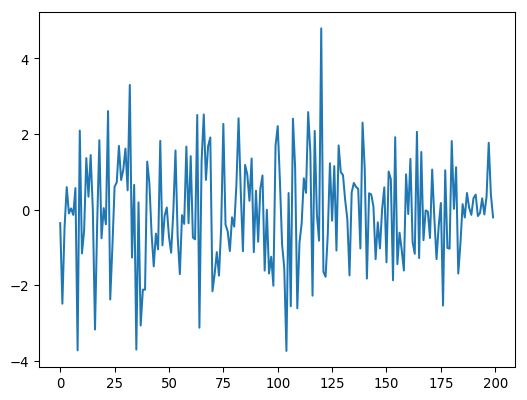

In [13]:
#dots = sns.load_dataset("dots").query("align == 'dots'")
#ax = sns.lineplot(x='time', y='y',data=sim_df)

ax = plt.plot(sim_df['time'], sim_df['y'])

### Sigma Simulation

In [47]:
def sim_sigma(alpha, beta, x, mu, rho, T):
  s=0
  for t in range(T):
    s=s+((x[t]-mu-rho*(x[t]-mu))^2)+((x[0]-mu)^2)*(1-rho^2)

  new_alpha=alpha+(T+1)/2
  new_beta=beta+0.5*s
  res=sp.stats.invgamma.rvs(new_alpha,scale = new_beta)   
  
  return [res, new_alpha, new_beta]


In [48]:
sim_sigma(0.3, 0.5, [3, 4, 5, 6], 2, 1, 4)

9.882726887861669